<a href="https://colab.research.google.com/github/Gichere/machine-learning-linear-regression/blob/main/linear_regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A Machine Learning Algorithm to predict the amount that a customer is likely to spend on Black Friday
 The primary objective of this project is to create a simple machine learning algorithm 
that predicts the amount of money that a person is likely to spend on Black Friday
depending on features such as gender, age, and occupation

## Questions to answer
1. What gender shops more on Black Friday? 
2. Do the occupations of the people have any impact on sales? 
3. Which age group is the highest spender?
4. Is it true that female customers are highly dominant in comparison to male customers? 

## Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##Importing the dataset

In [2]:
# Importing the black fiday dataset
data = pd.read_csv('https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv')

In [3]:
# Getting some basic information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Looking at the data, it possesses 12 different parameters: 7 numerical (integer and float)
and 5 object variables. Furthermore, the dataset contains two short type variables:
Product_Category_2 and Product_Category_3. (this problem will be handled later)

## Printing information about first five customers

In [4]:
#(first five rows of our DataFrame)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Answering: Is it true that female customers are highly dominant in comparison to male customers? 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


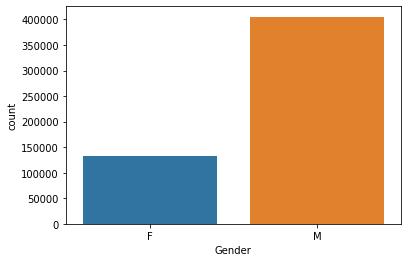

In [5]:
sns.countplot(data['Gender'])

The graph shows that there are almost 3 times more male customers than female customers! 
Why is that? Maybe male visitors are more likely to go out and buy something for their ladies when more deals are present.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


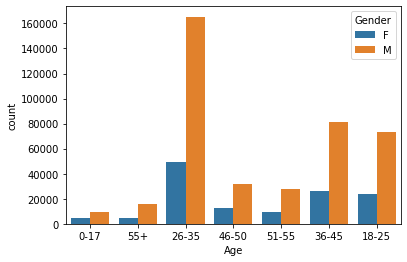

In [6]:
# Exploring the Gender category by checking on its distribution while putting into consideration Age variable
sns.countplot(data['Age'], hue=data['Gender'])

From the figure above, it can be easily concluded that the highest number of customers belong to the age group
between 26 and 35, for both genders. 
Younger and older population are far less represented on Black Friday. 
Based on these results, the retail store should sell most of the products that target people in their late twenties
to early thirties. To increase profits, the number of products targeting people around their thirties 
can be increased while the number of products that target the older or younger population can be reduced.

## Descriptive statistics

In [7]:
#Computing the descriptive statistics for the dataset
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
data['User_ID'].nunique()

5891

In [9]:
data['Product_ID'].nunique()

3623

Analyzing the User_ID column using the nunique method. 
From this it can be concluded that in this specific retail store, during Black Friday, 5,891 different customers have bought something from the store. 
From Product_ID category on extraction of information, 3,623 different products are sold.

## Exploring the occupation category
The Occupation number is the ID number of occupation type of each customer. 
creating the function which will extract all unique elements from one column (to extract all different occupations).

In [10]:
# using the unique function, from the numpy Python library
def unique(column):
    x=np.array(column)
    print(np.unique(x))

In [11]:
print ("The unique ID numbers of customers occupations:")
unique(data['Occupation'])

The unique ID numbers of customers occupations:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


## 21 different occupation ID's are registered during the shopping day.
The Occupation number could represent different professions of customers:
for example, number 1 could be an engineer, number 2 - a doctor number 3 an artist, etc.

Finding how much money each customer group 
(grouped by occupation) spent using a for loop and sum the spent 
money for each individual ocuupation ID

In [12]:
occupation_id=list(range(0,12))
spent_money=[]
for oid in occupation_id:
    spent_money.append(data[data['Occupation']==oid]['Purchase'].sum())

In [13]:
spent_money

[625814811,
 414552829,
 233275393,
 160428450,
 657530393,
 112525355,
 185065697,
 549282744,
 14594599,
 53619309,
 114273954,
 105437359]

## Exploring the City category variable
This category gives us information about cities from which our customers are.

In [14]:
data['City_Category'].nunique()

3

 Looking at the ratio of customers from each of the three cities visually

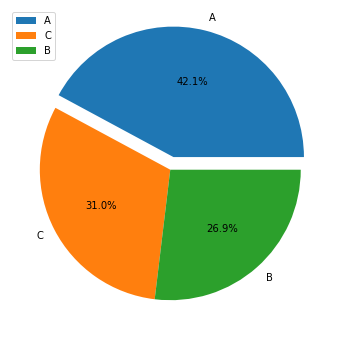

In [15]:
explode = (0.1,0,0)
fig1, ax1=plt.subplots(figsize=(11,6))
ax1.pie(data['City_Category'].value_counts(),explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

 It is evident from the pie chart that all the three cities are almost equally represented in the retail store during Black Fridays. Maybe the store is somewhere between these three cities, 
is easily accessible and has good road connections from these cities.

# Data Preprocessing for ML Algorithms
The task of the learning algorithms will be to predict the value of the Purchase variable, given customer information as input.
The first thing that need to be don is deal with missing data in columns Product_Category_2 and Product_Category_3.
Only 30% of data inside Product_Category_3 and 69% of data inside Product_Category_2. 
30% of real data is a small ratio, filling missing values inside this category with the mean of the existing values, but that means that 70% of data will be artificial, which could ruin a future machine learning model. 
The best alternative for this problem is to drop this column from further analysis. 
We will use drop function to do that:

In [16]:
data=data.drop(['Product_Category_3'], axis=1)

The column Product_Category_2 posses around 30% of missing data. Here it makes sense to fill missing values and use 
this column for fitting a machine learning model. This problem will be solved by inserting a mean value of the existing values in this column to the missing fields

In [17]:
data['Product_Category_2'].fillna((data['Product_Category_2'].mean()), inplace=True)

Checking the data frame once more

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 45.1+ MB


## Removing columns or variables that are not useful in the prediction model.
User_ID is is the number assigned automatically to each customer, and it is not useful for prediction purposes.
The Product_ID column contains information about the product purchased. It is not a feature of the customer. Therefore, it will be dropped too.

In [19]:
data=data.drop(['User_ID','Product_ID'], axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      537577 non-null  object 
 1   Age                         537577 non-null  object 
 2   Occupation                  537577 non-null  int64  
 3   City_Category               537577 non-null  object 
 4   Stay_In_Current_City_Years  537577 non-null  object 
 5   Marital_Status              537577 non-null  int64  
 6   Product_Category_1          537577 non-null  int64  
 7   Product_Category_2          537577 non-null  float64
 8   Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 36.9+ MB


The variable to be predicted is Purchase. The other columns will be used as predictor variables.

In [21]:
#converting the four categorical variables into numerical using get_dummies function

In [22]:
df_gender=pd.get_dummies(data['Gender'])
df_age=pd.get_dummies(data['Age'])
df_City_Category=pd.get_dummies(data['City_Category'])
df_Stay_In_Current_City_Years=pd.get_dummies(data['Stay_In_Current_City_Years'])

In [23]:
data_final=pd.concat([data, df_gender, df_age,df_City_Category,
                     df_Stay_In_Current_City_Years],axis=1)

In [24]:
data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.842144,8370,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.000000,15200,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.842144,1422,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.000000,1057,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.842144,7969,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


The newly created dummy columns are presented. All categorical variables are transformed into numerical. 
So, if a customer is between 0 and 17 years old (for example), only that column value will be equal to 1, other, other age group columns will have a value of 0. Similarly, if it is a male customer, the column named 'M' will be equal to 1 and column 'F' will be 0

The above can be used to train the machine learning model

## Predicting the Amount Spent by the customer on Black Friday using linear regression

In [25]:
x=data_final[['Occupation','Marital_Status','Product_Category_2','F','M', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C', '0', '1', '2', '3', '4+']]
y=data_final['Purchase']

Spliting the final dataset into a training and testing sets using train_test_split function
Training data is used for learning, adjusting parameters of a model and minimizing an error on the output.
The rest of the data (the Test set) is used to evaluate performances
the datset will be split into 75% training set and 25% test set

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

Importing the linear regression and training it using the training data set

In [27]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print(lm.fit(x_train,y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


The model is now trained. 

In [29]:
# printing the intercept parameter value and values of coefficients of the model
print('Intercept parameter:',lm.intercept_)
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 11184.870611701695
                    Coefficient
Occupation             8.836383
Marital_Status       -74.348650
Product_Category_2  -213.122414
F                   -322.241323
M                    322.241323
0-17                -510.293325
18-25                -94.766779
26-35                 65.423254
36-45                 84.176637
46-50                 36.306242
51-55                359.532757
55+                   59.621215
A                   -361.339207
B                   -141.183201
C                    502.522408
0                    -57.811937
1                      3.841706
2                     56.604185
3                     12.982780
4+                   -15.616734


### Using the test data as inputs of the model to see how well our model performs.

In [30]:
predictions=lm.predict(x_test)
print("Predicted purchases (in USD) for new customers:", predictions)

Predicted purchases (in USD) for new customers: [ 8383.37688765  8240.46496674 11728.52434227 ...  8361.36179407
 10032.55043509  7849.39349557]


## Performance Estimation of the Machine Learning model using mean absolute error(MAE) and mean squared error(MSE)

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3867.815925496528
MSE: 23780887.771736268
